<a href="https://colab.research.google.com/github/alexandergribenchenko/Data_Science_Toolkit/blob/main/Pycaret/LATAM_Model_Explorarions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret

In [ ]:
!pip show pycaret

Name: pycaret
Version: 3.0.0
Summary: PyCaret - An open source, low-code machine learning library in Python.
Home-page: https://github.com/pycaret/pycaret
Author: Moez Ali
Author-email: moez.ali@queensu.ca
License: MIT
Location: /usr/local/lib/python3.9/dist-packages
Requires: category-encoders, cloudpickle, deprecation, imbalanced-learn, importlib-metadata, ipython, ipywidgets, jinja2, joblib, kaleido, lightgbm, markupsafe, matplotlib, nbformat, numba, numpy, pandas, plotly, plotly-resampler, pmdarima, psutil, pyod, requests, schemdraw, scikit-learn, scikit-plot, scipy, sktime, statsmodels, tbats, tqdm, wurlitzer, xxhash, yellowbrick
Required-by: 


In [ ]:
import pycaret
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from pycaret.classification import *

In [ ]:
path_github = 'https://raw.githubusercontent.com/alexandergribenchenko/DS_LATAM_Test/main/df_modelo.csv'

In [ ]:
df_raw = pd.read_csv(path_github)
df_raw

,Des-I,Emp-I,DIA,MES,DIANOM,TIPOVUELO,temporada_alta,periodo_dia,atraso_15
0,KMIA,AAL,1,1,Domingo,I,1,noche,0
1,KMIA,AAL,2,1,Lunes,I,1,noche,0
2,KMIA,AAL,3,1,Martes,I,1,noche,0
3,KMIA,AAL,4,1,Miercoles,I,1,noche,0
4,KMIA,AAL,5,1,Jueves,I,1,noche,0
...,...,...,...,...,...,...,...,...,...
68201,SPJC,JAT,22,12,Viernes,I,1,tarde,1
68202,SPJC,JAT,25,12,Lunes,I,1,tarde,1
68203,SPJC,JAT,27,12,Miercoles,I,1,tarde,1
68204,SPJC,JAT,29,12,Viernes,I,1,tarde,0


In [ ]:
df_raw.columns

Index(['Des-I', 'Emp-I', 'DIA', 'MES', 'DIANOM', 'TIPOVUELO', 'temporada_alta',
       'periodo_dia', 'atraso_15'],
      dtype='object')

In [ ]:
clasificacion = setup(data= df_raw[['Des-I', 'Emp-I', 'MES', 'DIANOM', 'TIPOVUELO', 'temporada_alta','periodo_dia', 'atraso_15']],
                      target='atraso_15',
                      train_size = 0.7,
                      session_id=123,
                      imputation_type = None,
                      feature_selection = False,
                      fix_imbalance=True)

,Description,Value
0,Session id,123
1,Target,atraso_15
2,Target type,Binary
3,Original data shape,"(68206, 8)"
4,Transformed data shape,"(98290, 16)"
5,Transformed train set shape,"(77828, 16)"
6,Transformed test set shape,"(20462, 16)"
7,Ordinal features,1
8,Numeric features,2
9,Categorical features,5


In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
top_models = compare_models(include=['lr', 'dt', 'xgboost'], 
                            sort='Recall', 
                            fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.2708,0.5106,0.9091,0.1911,0.3152,0.0145,0.0525,6.7600
dt,Decision Tree Classifier,0.2769,0.5169,0.8978,0.1910,0.3144,0.0142,0.0466,0.5200
lr,Logistic Regression,0.6334,0.6575,0.5729,0.2693,0.3663,0.1533,0.1749,3.7660


Processing:   0%|          | 0/17 [00:00<?, ?it/s]

In [ ]:
print(top_models)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)


In [ ]:
top_models.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)>

In [ ]:
get_config('pipeline')

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('ordinal_encoding',
                 TransformerWrapper(exclude=None, include=['TIPOVUELO'],
                                    transformer=OrdinalEncoder(cols=['TIPOVUELO'],
                                                               drop_invariant=False,
                                                               handle_missing='return_nan',
                                                               handle_unknown='value',
                                                               mapping=[{'col': 'TIPOVUELO',
                                                                         'data_type': dtype('O'),
                                                                         'mapping': I      0
N      1
NaN   -1
dtype: int64}],
                                                               return_df=True,
                                                               ver...
                                                                   return_df=True,
                                                                   sigma=None,
                                                                   verbose=0))),
                ('balance',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=FixImbalancer(estimator=SMOTE(k_neighbors=5,
                                                                              n_jobs=None,
                                                                              random_state=None,
                                                                              sampling_strategy='auto')))),
                ('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+')))],
         verbose=False)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

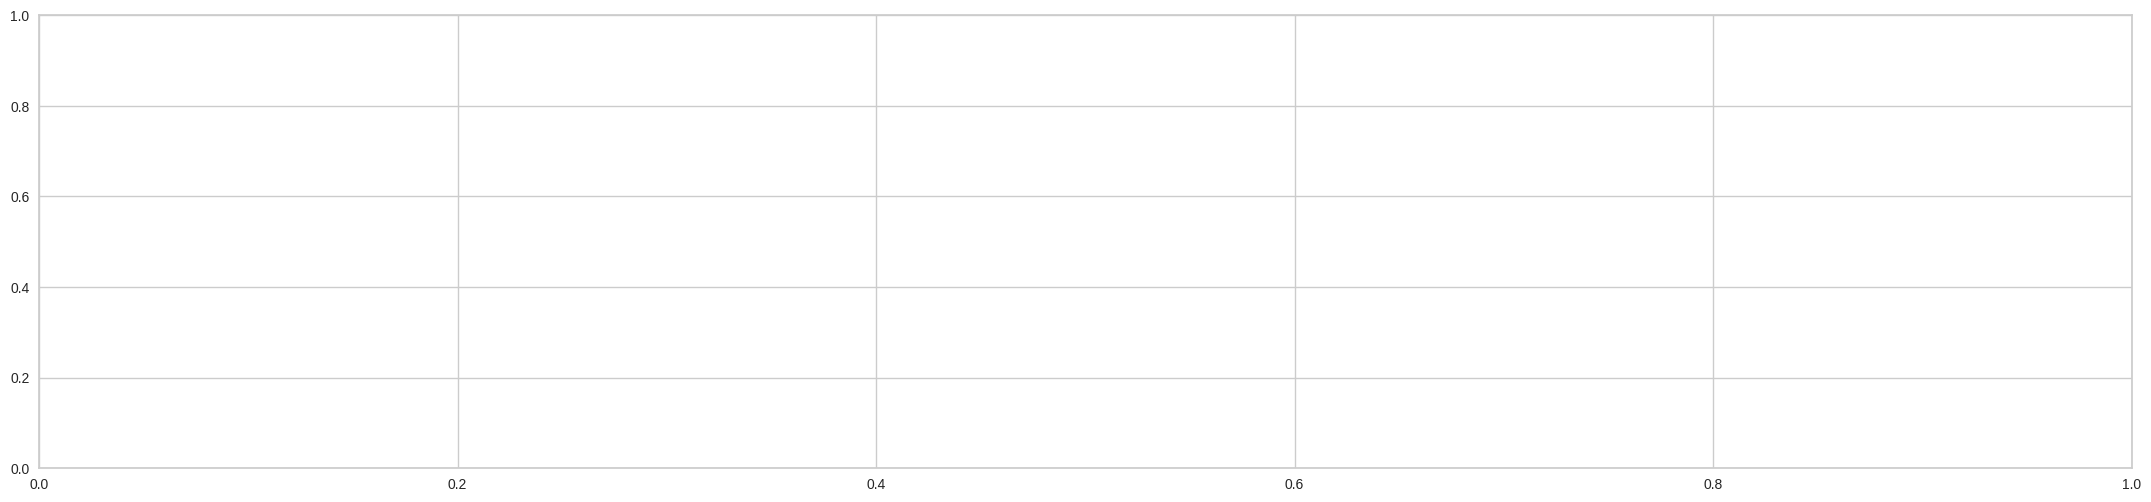

In [ ]:
evaluate_model(top_models)

In [ ]:
get_config??

In [ ]:
get_config('X_train')

,Des-I,Emp-I,MES,DIANOM,TIPOVUELO,temporada_alta,periodo_dia
49297,SPJC,LAN,9,Lunes,I,1,mañana
24368,SCCI,LAN,5,Miercoles,N,0,noche
53853,SCCF,LAN,10,Martes,N,0,noche
16840,SACO,LAN,3,Lunes,I,0,tarde
3837,SCTE,LAN,1,Domingo,N,1,noche
...,...,...,...,...,...,...,...
16475,SPJC,LAN,3,Miercoles,I,0,mañana
5351,LEMD,LAN,1,Jueves,I,1,noche
43800,SPJC,LAN,8,Miercoles,I,0,noche
7662,SCAT,SKU,2,Miercoles,N,1,tarde


Las variables posibles para get_config son: ['X_train_transformed', 'y_train', 'variables', 'y', 'train_transformed', 'data', 'y_transformed', 'y_test', 'test_transformed', 'target_param', 'log_plots_param', 'is_multiclass', 'seed', 'X_test', 'n_jobs_param', 'exp_name_log', 'X_transformed', 'variable_and_property_keys', 'html_param', 'logging_param', 'X_train', '_ml_usecase', 'fold_generator', '_available_plots', 'fix_imbalance', 'dataset', 'test', 'USI', 'X', 'pipeline', 'gpu_param', 'memory', 'y_train_transformed', 'train', 'y_test_transformed', 'fold_shuffle_param', 'fold_groups_param', 'idx', 'X_test_transformed', 'dataset_transformed', 'gpu_n_jobs_param', 'exp_id']

In [ ]:
get_config('dataset_transformed')

,Des-I,Emp-I,MES,DIANOM_Lunes,DIANOM_Miercoles,DIANOM_Martes,DIANOM_Domingo,DIANOM_Viernes,DIANOM_Jueves,DIANOM_Sabado,TIPOVUELO,temporada_alta,periodo_dia_mañana,periodo_dia_noche,periodo_dia_tarde,atraso_15
49297,0.225074,0.170876,9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,0.0,0.0,1
24368,0.151495,0.170914,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,1.0,0.0,0
53853,0.122403,0.170914,10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0.0,1.0,0.0,0
16840,0.313889,0.170914,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0
3837,0.169390,0.170876,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54190,0.238370,0.170914,10,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0
11989,0.275174,0.254425,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0,1.0,0.0,0
63723,0.122122,0.177776,12,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.0,1.0,1
27788,0.258290,0.264010,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0,0.0,1.0,1


In [ ]:
get_config('X_train')

,Des-I,Emp-I,MES,DIANOM,TIPOVUELO,temporada_alta,periodo_dia
49297,SPJC,LAN,9,Lunes,I,1,mañana
24368,SCCI,LAN,5,Miercoles,N,0,noche
53853,SCCF,LAN,10,Martes,N,0,noche
16840,SACO,LAN,3,Lunes,I,0,tarde
3837,SCTE,LAN,1,Domingo,N,1,noche
...,...,...,...,...,...,...,...
16475,SPJC,LAN,3,Miercoles,I,0,mañana
5351,LEMD,LAN,1,Jueves,I,1,noche
43800,SPJC,LAN,8,Miercoles,I,0,noche
7662,SCAT,SKU,2,Miercoles,N,1,tarde


In [ ]:
get_config('X_test')

,Des-I,Emp-I,MES,DIANOM,TIPOVUELO,temporada_alta,periodo_dia
47237,SCIE,LAN,9,Miercoles,N,1,noche
57748,SCDA,SKU,11,Martes,N,0,mañana
7543,SCIE,SKU,2,Domingo,N,1,noche
24950,SCAR,LAN,5,Domingo,N,0,mañana
9639,SCTE,LAN,2,Miercoles,N,1,tarde
...,...,...,...,...,...,...,...
54190,SAEZ,LAN,10,Domingo,I,0,tarde
11989,SABE,ARG,3,Jueves,I,0,noche
63723,SCCF,SKU,12,Martes,N,0,tarde
27788,SKBO,AVA,6,Viernes,I,0,tarde


In [ ]:
get_config('pipeline')

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('ordinal_encoding',
                 TransformerWrapper(exclude=None, include=['TIPOVUELO'],
                                    transformer=OrdinalEncoder(cols=['TIPOVUELO'],
                                                               drop_invariant=False,
                                                               handle_missing='return_nan',
                                                               handle_unknown='value',
                                                               mapping=[{'col': 'TIPOVUELO',
                                                                         'data_type': dtype('O'),
                                                                         'mapping': I      0
N      1
NaN   -1
dtype: int64}],
                                                               return_df=True,
                                                               ver...
                                                                   return_df=True,
                                                                   sigma=None,
                                                                   verbose=0))),
                ('balance',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=FixImbalancer(estimator=SMOTE(k_neighbors=5,
                                                                              n_jobs=None,
                                                                              random_state=None,
                                                                              sampling_strategy='auto')))),
                ('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+')))],
         verbose=False)

In [ ]:
help(compare_models)

Help on function compare_models in module pycaret.classification.functional:

compare_models(include: Optional[List[Union[str, Any]]] = None, exclude: Optional[List[str]] = None, fold: Union[int, Any, NoneType] = None, round: int = 4, cross_validation: bool = True, sort: str = 'Accuracy', n_select: int = 1, budget_time: Optional[float] = None, turbo: bool = True, errors: str = 'ignore', fit_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, experiment_custom_tags: Optional[Dict[str, Any]] = None, probability_threshold: Optional[float] = None, engine: Optional[Dict[str, str]] = None, verbose: bool = True, parallel: Optional[pycaret.internal.parallel.parallel_backend.ParallelBackend] = None) -> Union[Any, List[Any]]
    This function trains and evaluates performance of all estimators available in the
    model library using cross validation. The output of this function is a score grid
    with average cross validated scores. Metrics evaluated during CV can be access